# 🚀 **CLUSTERING - Caso Netflix: Sistema de Recomendación Inteligente** 🎬

## 📄 Descripción del Dataset

Este dataset pertenece al proyecto **MovieLens**, ampliamente utilizado para investigación en sistemas de recomendación. Cada fila representa una película, con las siguientes características:

- **ID**: Identificador único de la película.
- **Title**: Título de la película con su año de lanzamiento.
- **ReleaseDate**: Fecha de estreno en cines.
- **VideoReleaseDate**: Fecha de lanzamiento en video (vacía en muchos casos).
- **IMDB**: Enlace a la página de la película en IMDb.
- **Géneros**: 19 columnas binarias que indican si la película pertenece a géneros como *Action*, *Comedy*, *Drama*, *SciFi*, entre otros.

🔍 Este dataset será la base para aplicar **clustering**, agrupando películas similares en función de sus géneros, con el objetivo de entender cómo plataformas como **Netflix** generan recomendaciones inteligentes.

## 📄 Cargar dataset

In [ ]:
import pandas as pd

# Cargar el archivo
movies = pd.read_csv("movieLens.txt", 
                     header=None, 
                     sep="|", 
                     quotechar="\"",
                     encoding="latin1")

movies.columns = ["ID", "Title", "ReleaseDate", 
                  "VideoReleaseDate", "IMDB", "Unknown",
                  "Action", "Adventure", "Animation", 
                  "Childrens", "Comedy", "Crime", 
                  "Documentary", "Drama", "Fantasy", 
                  "FilmNoir", "Horror", "Musical", 
                  "Mystery", "Romance", "SciFi", 
                  "Thriller", "War", "Western"]

# Ver la estructura del dataframe
print(movies.info())

## 📄 Limpiar datos/columnas innecesarios

In [ ]:
# Eliminar columnas que no aportan al objetivo
movies.drop(columns=["ID", "ReleaseDate", "VideoReleaseDate", "IMDB"], inplace=True)

# Cantidad de filas antes de eliminar duplicados
original_rows = movies.shape[0]

# Eliminar duplicados
movies = movies.drop_duplicates()

# Cantidad de filas después
final_rows = movies.shape[0]

# Mostrar resumen
print(f"Filas antes: {original_rows}")
print(f"Filas después de eliminar duplicados: {final_rows}")
print(f"Duplicados eliminados: {original_rows - final_rows}")

print(movies.columns)

print(movies.head)

Filas antes: 1682
Filas después de eliminar duplicados: 1664
Duplicados eliminados: 18
Index(['Title', 'Unknown', 'Action', 'Adventure', 'Animation', 'Childrens',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'FilmNoir',
       'Horror', 'Musical', 'Mystery', 'Romance', 'SciFi', 'Thriller', 'War',
       'Western'],
      dtype='object')
<bound method NDFrame.head of                                           Title  Unknown  Action  Adventure  \
0                              Toy Story (1995)        0       0          0   
1                              GoldenEye (1995)        0       1          1   
2                             Four Rooms (1995)        0       0          0   
3                             Get Shorty (1995)        0       1          0   
4                                Copycat (1995)        0       0          0   
...                                         ...      ...     ...        ...   
1676                       Sweet Nothing (1995)        0      

## 📄 Calular las distancias y aplicar clustering jerárquicos

### 🧠 ¿Qué es la distancia euclidiana?
Es la forma más común de medir la distancia entre dos puntos en un espacio. Es como usar una regla para medir qué tan lejos están dos puntos.

Ejemplo con películas

Imaginá que tenés dos películas con puntajes (0 o 1) en géneros:

| Película       | Acción | Comedia | Drama |
|----------------|--------|---------|-------|
| Men in Black   |   1    |    1    |   0   |
| Titanic        |   0    |    0    |   1   |


Vector para cada una:

*Men in Black = [1, 1, 0]*

*Titanic = [0, 0, 1]*

Distancia euclidiana entre ellas:


\[
\text{Distancia} = \sqrt{(0 - 1)^2 + (0 - 1)^2 + (1 - 0)^2}
= \sqrt{1 + 1 + 1} = \sqrt{3} \approx 1.73
\]


💡 Cuanto más parecidas sean dos películas, menor será la distancia entre ellas.


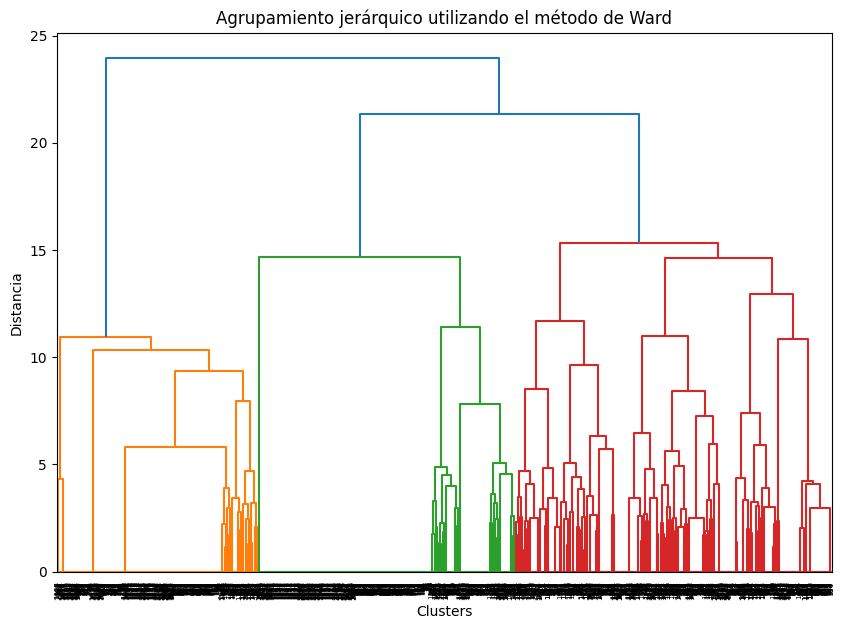

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist, squareform

# Excluir la columna de títulos
features = movies.iloc[:, 1:]

# Calcular distancias euclidianas entre las películas
distances = pdist(features, metric='euclidean')

# Realizar un agrupamiento jerárquico utilizando el método de Ward.
linked = linkage(distances, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Agrupamiento jerárquico utilizando el método de Ward')
plt.xlabel('Clusters')
plt.ylabel('Distancia')
plt.show()

## 📄 Encontrar el perfil temático de cada cluster (10 Cluster)

Calculamos el promedio (media) de un género específico dentro de cada cluster para definir su temática.

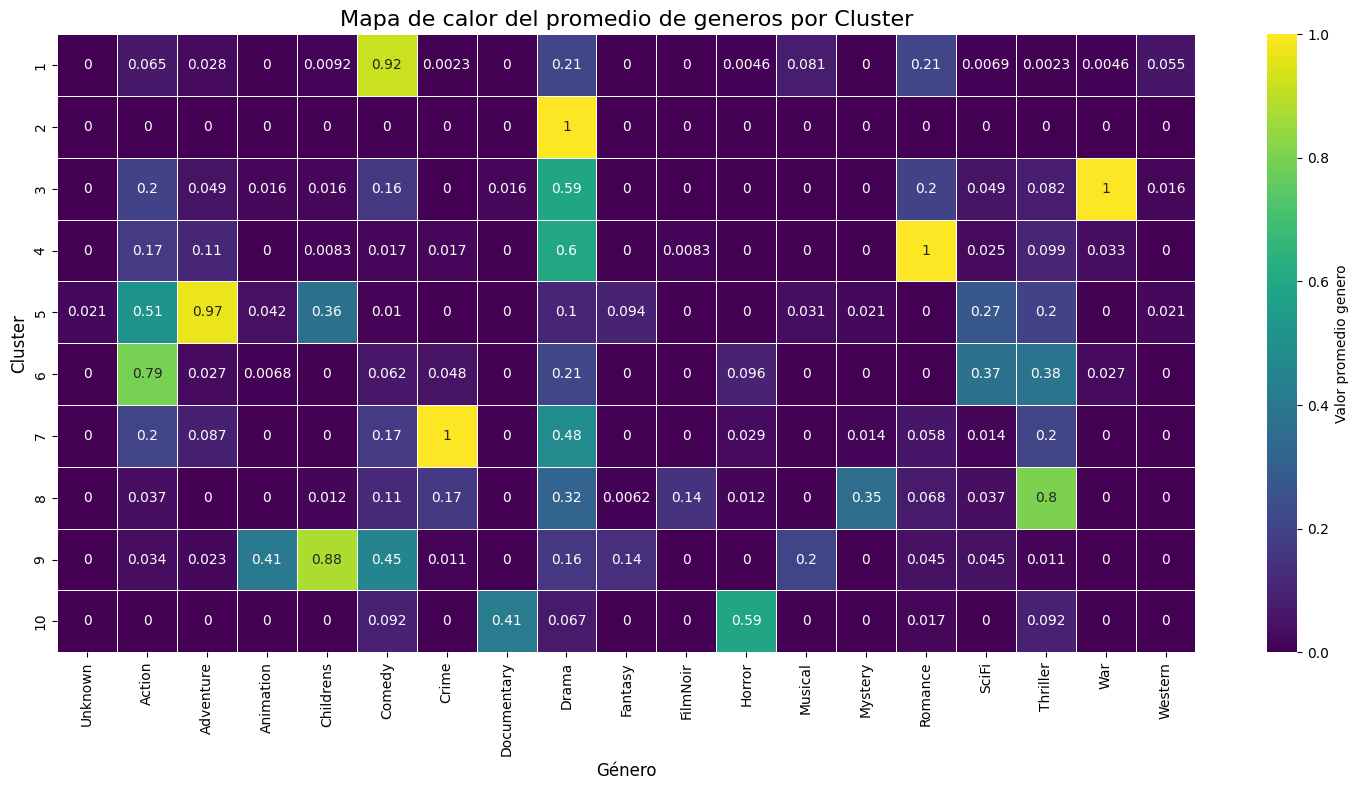

In [ ]:
from scipy.cluster.hierarchy import fcluster
import seaborn as sns

# Definir en el 10 clusters las peliculas
cluster_groups = fcluster(linked, t=10, criterion='maxclust')

# Agregar como columna al data set de peliculas el cluster donde esta ubicado.
movies['Cluster'] = cluster_groups

genres = [
    "Unknown", "Action", "Adventure", "Animation", 
    "Childrens", "Comedy", "Crime", 
    "Documentary", "Drama", "Fantasy", 
    "FilmNoir", "Horror", "Musical", 
    "Mystery", "Romance", "SciFi", 
    "Thriller", "War", "Western"
]

mean_values = {}

# Calculate the mean for each genre
for genre in genres:
    mean_values[genre] = movies.groupby('Cluster')[genre].mean()

mean_table = pd.DataFrame(mean_values)

# Mapa de calor de los promedios
plt.figure(figsize=(15, 8))
sns.heatmap(mean_table, annot=True, cmap='viridis', cbar_kws={'label': 'Valor promedio genero'}, linewidths=0.5)
plt.title('Mapa de calor del promedio de generos por Cluster', fontsize=16)
plt.xlabel('Género', fontsize=12)
plt.ylabel('Cluster', fontsize=12)
plt.tight_layout()
plt.show()

## 📄 Casuisticas del negocio

📦 ¿En que cluster (Temática) esta ubicado la pelicula  **Men in Black (1997)**?

In [ ]:
men_in_black_cluster = movies[movies['Title'] == "Men in Black (1997)"]['Cluster'].iloc[0]
print("El cluster para la pelicula 'Men in Black (1997)' es:", men_in_black_cluster)


El cluster para la pelicula 'Men in Black (1997)' es: 1


📦 ¿Cuales son las 10 péliculas ubicadas en el cluster 2 (Temática 2)?

In [ ]:
# Filtar las peliculas por el por el cluster 2
cluster2 = movies[movies['Cluster'] == 2]

# Mostrar las 10 primeras películas
print(cluster2.head(10))

                                                Title  Unknown  Action  \
5   Shanghai Triad (Yao a yao yao dao waipo qiao) ...        0       0   
8                             Dead Man Walking (1995)        0       0   
14                          Mr. Holland's Opus (1995)        0       0   
17                          White Balloon, The (1995)        0       0   
18                              Antonia's Line (1995)        0       0   
29                               Belle de jour (1967)        0       0   
36                                       Nadja (1994)        0       0   
45                                     Exotica (1994)        0       0   
51                 Madness of King George, The (1994)        0       0   
56                                      Priest (1994)        0       0   

    Adventure  Animation  Childrens  Comedy  Crime  Documentary  Drama  ...  \
5           0          0          0       0      0            0      1  ...   
8           0          0   

Este resultado arroja, que si el usuario mira la película Dead Man Walking (1995), el sistema podría recomendarle la película Mr. Holland's Opus (1995), White Balloon, The (1995) etc.